# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [6]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt

plt.style.use('dark_background')

pd.set_option('display.max_columns', None)

In [7]:
# Your code here
data = pd.read_csv('data_all.zip')

In [26]:
data.head()

,e,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,21.0,37.0,37.0,21.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,50.0,115.0,172.0,215.0,215.0,170.0,78.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.0,158.0,219.0,241.0,242.0,221.0,217.0,232.0,206.0,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,159.0,245.0,232.0,145.0,114.0,51.0,41.0,146.0,243.0,164.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,95.0,231.0,222.0,123.0,22.0,4.0,0.0,4.0,127.0,250.0,245.0,158.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,77.0,218.0,248.0,139.0,12.0,0.0,0.0,0.0,5.0,129.0,250.0,254.0,215.0,37.0,0.0,0

In [8]:
data.shape

(116322, 785)

In [22]:
X = data.drop('e', axis = 1)
y = data['e']

print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (116322, 784)
y shape: (116322,)


In [58]:
y.sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61.])

In [11]:
images = [np.array(row) for index, row in X.iterrows()]

In [12]:
images = [image.reshape(28,28) for image in images]

In [29]:
images[0].shape

(28, 28)

e:
   * 0 - 9 Number
   * 10 - 35 Upper
   * 36 - 61 lower

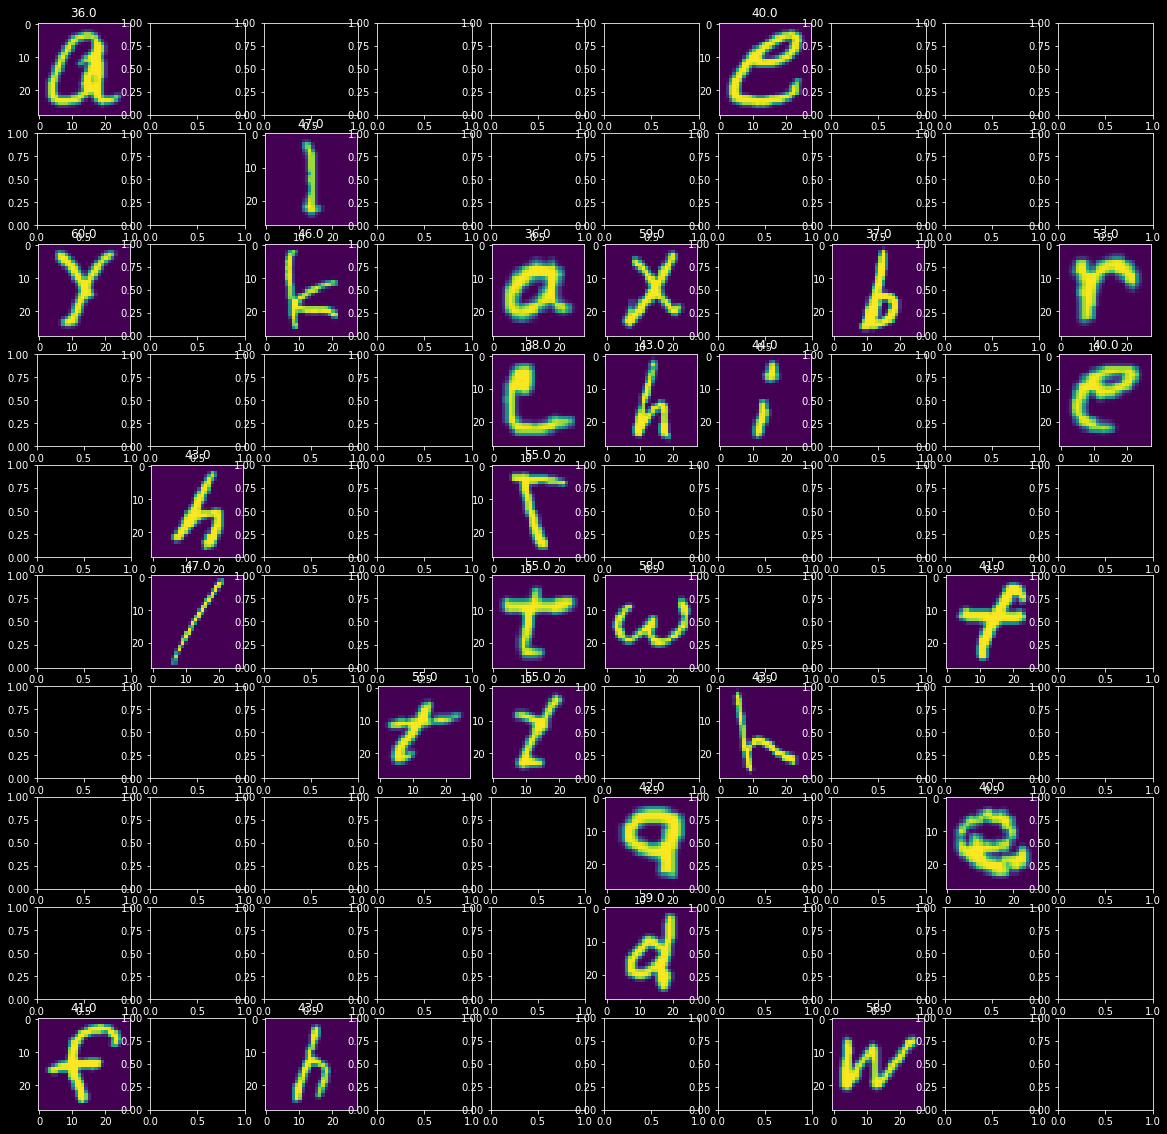

In [74]:
fig, axes = plt.subplots(10,10, figsize=(20,20))
for i,ax in enumerate(axes.flat):
    title = y[i]
    if title >= 36 and title <= 61:
        ax.imshow(images[i])
        ax.set_title(title)

In [102]:
y_upper = y.apply(lambda x: 1 if (x>=10) & (x <=35) else 0)
y_lower = y.apply(lambda x: 1 if (x>=35) & (x <=61) else 0)
y_number = y.apply(lambda x: 1 if (x>=0) & (x <=10) else 0)

In [121]:
def MultipleClassifiers(func, X, y, test_size = 0.2,):
    """ 
    Function that trains a model and return metrics
            
    :param X: data for training
    :param y: target values
    :param test_size: for trian _test_split(by default = .2)
    :return: accuracy, report and confusion matrix
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, 
                                                        random_state=0)
    
    model = func
    print('Training... Go grab a coffee')
    clf = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = metrics.accuracy_score(y_test, y_pred)
    report = metrics.classification_report(y_test, y_pred)
    conf_m = metrics.confusion_matrix(y_test, y_pred)
    print('--------------------------------------------------------')
    print(f'Accuracy Score: {acc}')
    print('--------------------------------------------------------')
    print(report)
    print('--------------------------------------------------------')
    print('Cofusion Matix:')
    print(conf_m)
    
    return acc, report, conf_m

In [118]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(max_depth=5),
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB()]

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [126]:
for model in models:
        print(str(model))
        acc,report, conf_m = MultipleClassifiers(model,X, y_upper)
        print("*********************************\n*********************************")

LogisticRegression()
Training... Go grab a coffee


C:\Users\Emilio\anaconda3\envs\data\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------------------
Accuracy Score: 0.7475177304964539
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.93      0.84     17037
           1       0.56      0.26      0.35      6228

    accuracy                           0.75     23265
   macro avg       0.67      0.59      0.60     23265
weighted avg       0.72      0.75      0.71     23265

--------------------------------------------------------
Cofusion Matix:
[[15792  1245]
 [ 4629  1599]]
--------------------------------
DecisionTreeClassifier(max_depth=5)
Training... Go grab a coffee
--------------------------------------------------------
Accuracy Score: 0.7496668815817752
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.92      0.84     17037
           1       0.56      0.29      0.39      6228

    accur

#### Conlusions: 
1 = Upper<br>
0 = Non-Upper

   * Logistic:
        - 74.75% ratio of correct to incorrect preds (accuracy)
        - Decent at identifying 0 but bad at 1. (precision)
        - Good at finding all examples of 0 but bad at 1 (recall)
        
   * DecisionTreeClassifier:
        - 74.96% ratio of correct to incorrect preds (accuracy)
        - Decent at identifying 0 but bad at 1. (precision)
        - Good at finding all examples of 0 but bad at 1 (recall)
        
   * KNeighborsClassifier:
        - 85.64% ratio of correct to incorrect preds (accuracy)
        - Decent at identifying 0 but bad at 1. (precision)
        - V. Good at finding all examples of 0 but decent at 1 (recall)
        
   * GaussianNB:
        - 74.27% ratio of correct to incorrect preds (accuracy)
        - Decent at identifying 0 but bad at 1. (precision)
        - V.Good at finding all examples of 0 but really bad at 1 (recall)

* Try to do the same thing with lowercases.

In [127]:
# Your code here
for model in models:
        print(str(model))
        acc,report, conf_m = MultipleClassifiers(model,X, y_lower)
        print("*********************************\n*********************************")

LogisticRegression()
Training... Go grab a coffee


C:\Users\Emilio\anaconda3\envs\data\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------------------
Accuracy Score: 0.806662368364496
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     17752
           1       0.67      0.36      0.47      5513

    accuracy                           0.81     23265
   macro avg       0.75      0.65      0.68     23265
weighted avg       0.79      0.81      0.78     23265

--------------------------------------------------------
Cofusion Matix:
[[16757   995]
 [ 3503  2010]]
*********************************
*********************************
DecisionTreeClassifier(max_depth=5)
Training... Go grab a coffee
--------------------------------------------------------
Accuracy Score: 0.7892972275950999
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     17752
           1       0.60      0

#### Conlusions: 
1 = Upper<br>
0 = Non-Upper

   * Logistic:
        - 80.66% ratio of correct to incorrect preds (accuracy)
        - Good at identifying 0 but decent at 1. (precision)
        - Very Good at finding all examples of 0 but bad at 1 (recall)
        
   * DecisionTreeClassifier:
        - 78.92% ratio of correct to incorrect preds (accuracy)
        - Good at identifying 0 but bad at 1. (precision)
        - Very Good at finding all examples of 0 but really bad at 1 (recall)
        
   * KNeighborsClassifier:
        - 87.84% ratio of correct to incorrect preds (accuracy)
        - Very Good at identifying 0 and good at 1. (precision)
        - Very Good at finding all examples of 0 but bad at 1 (recall)
        
   * GaussianNB:
        - 26.92% ratio of correct to incorrect preds (accuracy)
        - Good at identifying 0 but really bad at 1. (precision)
        - Horrible at finding all examples of 0 and Excellent at 1 (recall)

* Try to do the same thing with numbers.

In [128]:
# Your code here
for model in models:
        print(str(model))
        acc,report, conf_m = MultipleClassifiers(model,X, y_number)
        print("*********************************\n*********************************")

LogisticRegression()
Training... Go grab a coffee


C:\Users\Emilio\anaconda3\envs\data\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------------------
Accuracy Score: 0.723318289275736
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.68      0.71     11429
           1       0.71      0.77      0.74     11836

    accuracy                           0.72     23265
   macro avg       0.72      0.72      0.72     23265
weighted avg       0.72      0.72      0.72     23265

--------------------------------------------------------
Cofusion Matix:
[[7748 3681]
 [2756 9080]]
*********************************
*********************************
DecisionTreeClassifier(max_depth=5)
Training... Go grab a coffee
--------------------------------------------------------
Accuracy Score: 0.7188050719965614
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.68      0.70     11429
           1       0.71      0.76 

#### Conlusions: 
1 = Upper<br>
0 = Non-Upper

   * Logistic:
        - 72.33% ratio of correct to incorrect preds (accuracy)
        - Decent at identifying 0 but decent at 1. (precision)
        - Decent at finding all examples of 0 and decent at 1 (recall)
        
   * DecisionTreeClassifier:
        - 71.88% ratio of correct to incorrect preds (accuracy)
        - decent at identifying 0 and decent at 1. (precision)
        - decent at finding all examples of 0 and decent at 1 (recall)
        
   * KNeighborsClassifier:
        - 87.58% ratio of correct to incorrect preds (accuracy)
        - Good at identifying 0 and good at 1. (precision)
        - Good at finding all examples of 0 and Very Good at 1 (recall)
        
   * GaussianNB:
        - 55.09% ratio of correct to incorrect preds (accuracy)
        - Decent at identifying 0 but really bad at 1. (precision)
        - Bad at finding all examples of 0 and Excellent at 1 (recall)

##### Overall:
- KNeighbors is the best.
- Gaussian are the worst.
- Logistic and Tree are regular.